# Notebook for loading data and beginning machine learning

Research: 
- journal: http://iraj.in/journal/journal_file/journal_pdf/1-10-139036756510-16.pdf
    - Overview of supervised learning algorithms

## Load data

In [313]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray

In [349]:
# load from data file

path = "processed_images/"
name = "data.txt"
filename = path + name

data = pd.read_csv(filename, delimiter = ",", engine='python')

images = []

for i in range(0, len(data)):
    img_num = img_nums[i]
    img_file = "{}.png".format(img_num)
    img_name = path+img_file

    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    images.append(img)
    
# add images to dataframe for ease later
data['image'] = pd.Series(images, index=data.index)

# CHECK:
#img = data['image'].iloc[0]
#plt.imshow(img)
#print(data)
#print(labels)
#print(len(images))

## Create training and testing sets

In [350]:
## split into training and testing sets
num_samples = data.shape[0]
training_size = .5
testing_size = 1 - training_size

# generate random sample from data for training set, and make testing set all else
msk = np.random.rand(num_samples) < training_size
training_data = data[msk]
testing_data = data[~msk]

#print(training_set)
#print(testing_set)

## Pre-process data with Principle Component Analysis
to extract meaningful features from data. Images are too big!

Resources:
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [351]:
# imports
from sklearn.decomposition import PCA

In [352]:
# Need to turn each image into vector
# 2d array: Array of image vectors
training_images = np.array(training_data.loc[:,'image'])

training_images_compressed = []

for i,image in enumerate(training_images):
    temp = np.asarray(image.flatten())
    training_images_compressed.append(temp)
        
training_images_compressed = np.asarray(training_images_compressed)

#test = training_images[0]
#print(test.shape)
#print(training_images_compressed[0].shape)
print(training_images_compressed.shape)

(292, 36)


In [391]:
# apply pca
pca = PCA(n_components=2)
pca.fit(training_images_compressed)

# Reconstruct faces with principle components
components = pca.transform(training_images_compressed)
images_projected = pca.inverse_transform(components)

print(training_images_compressed.shape)
print(plot_projected.shape)
#print(pca.components_)
#print(pca.explained_variance_)
#print(plot_projected[:, 0])

(292, 36)
(292, 2)


## Interesting plots from PCA

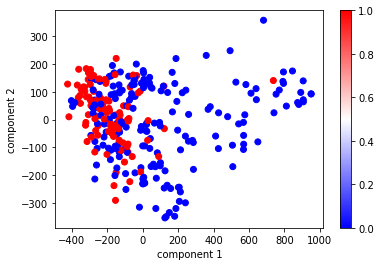

In [397]:
# Plot first two principal commponets of each point to learn about the data
# 0 means not a cosmic ray, 1 means it is

# Use this to plot thing
plot_projected = pca.fit_transform(training_images_compressed)
labels = np.asarray(training_data.loc[:,'label'])

plt.scatter(plot_projected[:, 0], plot_projected[:, 1], c=labels,cmap='bwr');
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

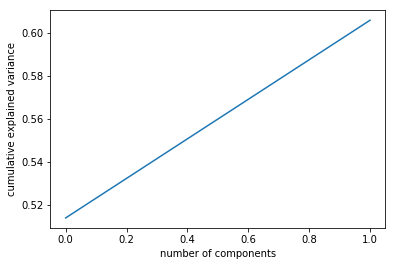

In [374]:
# See how much info each projection preserves

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

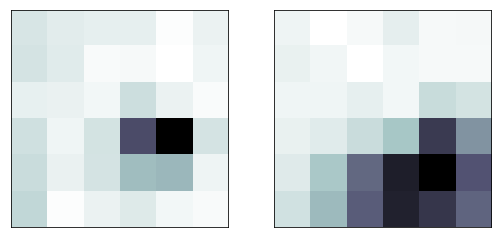

In [375]:
# Visualize images
fig, axes = plt.subplots(1,2, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(6,6), cmap='bone')

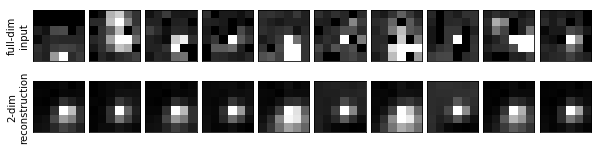

In [383]:
# Plot comparison between some original and reconstructions
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(training_images[i], cmap='binary_r')
    ax[1, i].imshow(images_projected[i].reshape(6,6), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('2-dim\nreconstruction');